<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/GD_vectors_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный спуск для функции нескольких переменных (векторная форма)

## Импорт библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
RANDOM_STATE = 42
np.random.RandomState(RANDOM_STATE);

## Практика

Обучающие данные.

In [ ]:
df = pd.DataFrame({'x1' : [10, 5, 7], 'x2' : [40, 36, 30], 'y' : [100, 73, 71]})
df

,x1,x2,y
0,10,40,100
1,5,36,73
2,7,30,71


Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели.
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами.  
Здесь мы  воспользуемся готовой функцией из библиотеку numpy - `numpy.linalg.norm`.

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем градиентный спуск по формуле

$$w_{new} = w_{prev} - \nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=\frac2m X^T(Xw-y).$$

Итак, реализуем метод градиентного спуска:

*  первым шагом добавим к матрице `X` единичный столбец - это константный признак, равный 1 на всех объектах.  
Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$  
В python скалярное произведение можно записать так: `w@x`

*  затем инициализируем случайным образом вектор весов `params`

*  зададим пустой массив `cost_track`, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

In [ ]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

Создадим функцию для получения предсказания модели

In [ ]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

Применим градиентный спуск

In [ ]:
track, weights = gradient_descent(df[['x1','x2']], df['y'], 0.0001, 5000)

print(weights)

[0.4739424  3.9341393  1.47526617]


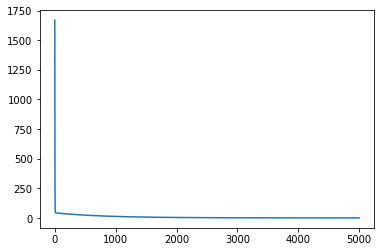

In [ ]:
plt.plot(track);